In [8]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis


In [3]:
#load data
train_array, test_array = dat.load_data()

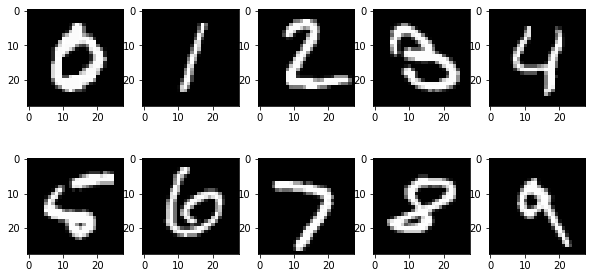

In [5]:
vis.ten_digits(test_array)

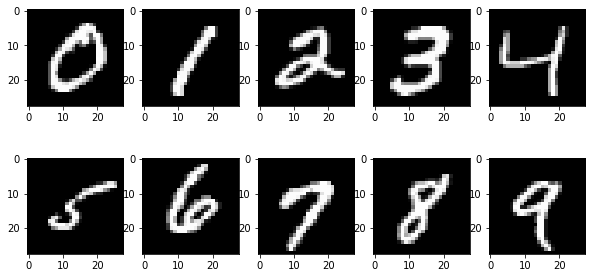

In [6]:
vis.ten_digits(train_array)

NameError: name 'img2' is not defined

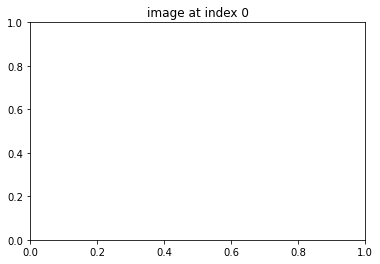

In [9]:
vis.show_digit(dataset = train_array, sample = 0)